# House Price Prediction

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go 

In [2]:
DATA_DIR = '..\..\#DATA'
data = pd.read_excel(DATA_DIR + '\House_Price_Prediction\data.xlsx')
data.head()

,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   taille_en_pieds_carre  47 non-null     int64
 1   nb_chambres            47 non-null     int64
 2   prix                   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
data.isna().sum()

taille_en_pieds_carre    0
nb_chambres              0
prix                     0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,taille_en_pieds_carre,nb_chambres,prix
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Data Visualisation

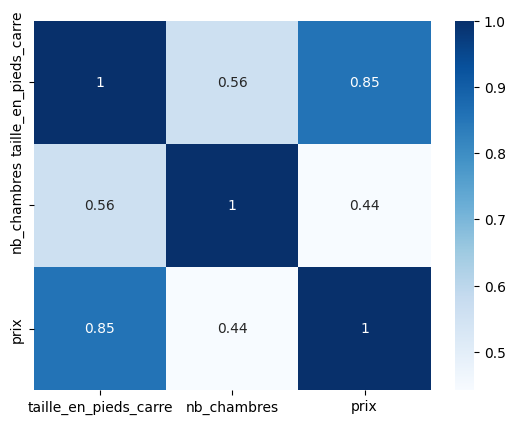

In [7]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x="taille_en_pieds_carre", y="prix", data=data, ax=axes[0])

sns.regplot(x="nb_chambres", y="prix", data=data, ax=axes[1])

plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data['taille_en_pieds_carre'], y=data['nb_chambres'], z=data['prix'],
                           mode='markers'))

fig.update_layout(scene=dict(xaxis_title='taille_en_pieds_carre',
                             yaxis_title='nb_chambres',
                             zaxis_title='prix'),
                  margin=dict(l=0, r=0, b=0, t=40))

## Modeling

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X.shape, y.shape)

(47, 2) (47,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37, 2), (10, 2), (37,), (10,))

In [ ]:
mlr = LinearRegression()

mlr.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [ ]:
print("The training score: ", mlr.score(X_train, y_train))
print("The testing score: ", mlr.score(X_test, y_test))

The training score:  0.6167939731293637
The testing score:  0.8137200145431086


In [ ]:
predicted_price = mlr.predict(data.iloc[:, :-1])

In [ ]:
x1, x2 = np.meshgrid(data['taille_en_pieds_carre'], data['nb_chambres'])
predicted_price = mlr.predict(np.array([x1.flatten(), x2.flatten()]).T)
predicted_price = predicted_price.reshape(x1.shape)

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data['taille_en_pieds_carre'], y=data['nb_chambres'], z=data['prix'],
                           mode='markers'))

fig.add_trace(go.Surface(x=data['taille_en_pieds_carre'], y=data['nb_chambres'], z=predicted_price,
                           colorscale='Reds', opacity=0.7, name='Mlr'))

fig.update_layout(scene=dict(xaxis_title='taille_en_pieds_carre',
                             yaxis_title='nb_chambres',
                             zaxis_title='prix'),
                  margin=dict(l=0, r=0, b=0, t=40),
                  height=600, width=1000,
                  title_text="Multiple Linear Regression")

fig.show()

c:\Users\admin\Desktop\My Projects\my_env\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

